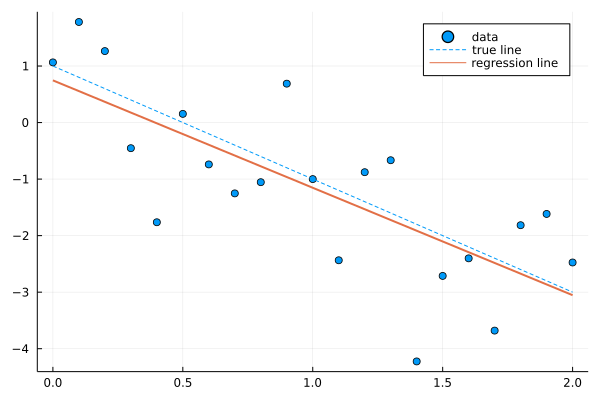

In [1]:
using Plots

f(x) = 1 - 2x
x = range(0, 2; length=21)
y = @. f(x) + randn()
X = x .^ (0:1)'

β̂ = X \ y # \beta TAB \hat TAB
g(x) = β̂[1] + β̂[2]*x

xs = range(extrema(x)...; length=300)
scatter(x, y; label="data", color=1)
plot!(xs, f; label="true line", color=1, ls=:dash)
plot!(xs, g; label="regression line", color=2, lw=2)

In [2]:
x = range(0, 2; length=21)

0.0:0.1:2.0

In [3]:
collect(x)

21-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
 1.1
 1.2
 1.3
 1.4
 1.5
 1.6
 1.7
 1.8
 1.9
 2.0

In [4]:
X = x .^ (0:1)'

21×2 Matrix{Float64}:
 1.0  0.0
 1.0  0.1
 1.0  0.2
 1.0  0.3
 1.0  0.4
 1.0  0.5
 1.0  0.6
 1.0  0.7
 1.0  0.8
 1.0  0.9
 1.0  1.0
 1.0  1.1
 1.0  1.2
 1.0  1.3
 1.0  1.4
 1.0  1.5
 1.0  1.6
 1.0  1.7
 1.0  1.8
 1.0  1.9
 1.0  2.0

In [5]:
x .^ (0:3)'

21×4 Matrix{Float64}:
 1.0  0.0  0.0   0.0
 1.0  0.1  0.01  0.001
 1.0  0.2  0.04  0.008
 1.0  0.3  0.09  0.027
 1.0  0.4  0.16  0.064
 1.0  0.5  0.25  0.125
 1.0  0.6  0.36  0.216
 1.0  0.7  0.49  0.343
 1.0  0.8  0.64  0.512
 1.0  0.9  0.81  0.729
 1.0  1.0  1.0   1.0
 1.0  1.1  1.21  1.331
 1.0  1.2  1.44  1.728
 1.0  1.3  1.69  2.197
 1.0  1.4  1.96  2.744
 1.0  1.5  2.25  3.375
 1.0  1.6  2.56  4.096
 1.0  1.7  2.89  4.913
 1.0  1.8  3.24  5.832
 1.0  1.9  3.61  6.859
 1.0  2.0  4.0   8.0

In [6]:
X \ y

2-element Vector{Float64}:
  0.7459959947027405
 -1.8997850226496482

In [7]:
(X'X)\X'y

2-element Vector{Float64}:
  0.7459959947027395
 -1.899785022649647

In [8]:
using LinearAlgebra
pinv(X)y

2-element Vector{Float64}:
  0.7459959947027407
 -1.8997850226496489

https://discourse.julialang.org/t/differences-in-a-b-for-sparse-and-nonsparse-rank-deficient-a/66917

In [9]:
using LinearAlgebra, SparseArrays

Is = [9, 8, 9, 12, 2, 5, 6, 11, 8, 12]
Js = [1, 3, 4, 4, 5, 5, 7, 7, 10, 10]
Vs = [0.046668312772398135, 0.0732172552606527, 0.07228019735547542, 0.27500506619596665, 0.8821260519923395, 0.188438924730004, 0.22883463110234215, 0.17705262933291666, 0.297278962545636, 0.07770904672896628]
A = sparse(Is, Js, Vs)
b = [0.0
 0.26743848063303416
 0.0
 0.0
 0.057129952809003536
 0.20824640373847988
 0.0
 0.1580262484804872
 0.09667497046894227
 0.0
 0.16112322314768995
 0.27723584012581337]

@show qr(A) \ b ≈ A \ b # True
@show A \ b ≈ pinv(Matrix(A))*b # False
@show qr(Matrix(A), Val(true)) \ b ≈ pinv(Matrix(A))*b # True;

qr(A) \ b ≈ A \ b = true
A \ b ≈ pinv(Matrix(A)) * b = false
qr(Matrix(A), Val(true)) \ b ≈ pinv(Matrix(A)) * b = true


In [10]:
typeof(A), typeof(b)

(SparseMatrixCSC{Float64, Int64}, Vector{Float64})

In [11]:
@show A \ b;

A \ b = [0.510163157650927, 0.0, 2.158319755608365, 1.0081117557603725, 0.3031749034381274, 0.0, 0.9100301066115529, 0.0, 0.0, 0.0]


In [12]:
@show Matrix(A) \ b;

Matrix(A) \ b = [0.7276686130520132, 0.0, 0.14045167726774938, 0.8676775428812918, 0.3031749034381275, 0.0, 0.9100301066115533, 0.0, 0.0, 0.49698357700473716]


In [13]:
@show pinv(Matrix(A)) * b;

pinv(Matrix(A)) * b = [0.7276686130520129, 0.0, 0.14045167726774946, 0.8676775428812922, 0.3031749034381275, 0.0, 0.9100301066115529, 0.0, 0.0, 0.4969835770047376]
